In [1]:
import numpy as np 
import musclebeachtools as mbt
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
import seaborn as sns
from copy import deepcopy as cdc
import scipy.io as sio
import scipy
import datetime as dt
import plotly
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
import math
import sahara_work as saw
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.formula.api as smf
import neuraltoolkit as ntk
from scipy.stats import ks_2samp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import random
from random import choices
from matplotlib.collections import PolyCollection

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Arial'})

from sys import platform
if platform == 'darwin':
    basedir = 'Volumes'
else:
    basedir = 'media'

from datetime import datetime

savedir = f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_1/'
today = datetime.today().strftime('%Y-%m-%d')

cmap = "YlGnBu"


/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/hlabhome/wg-mjames/.conda/envs/james_test/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
SAVEFIGS = 0

In [46]:
# Load FR dataframe:

good_an = np.array(['caf100', 'caf101', 'caf102', 'caf103', 'caf104', 'caf106',
       'caf107', 'caf108', 'caf109', 'caf22', 'caf26', 'caf34', 'caf37',
       'caf40', 'caf42', 'caf49', 'caf50', 'caf52',
       'caf61', 'caf62', 'caf66', 'caf69', 'caf72', 'caf77', 'caf78',
       'caf79', 'caf80', 'caf81', 'caf82', 'caf84', 'caf88', 'caf89',
       'caf90', 'caf92', 'caf94', 'caf95', 'caf97', 'caf99',
       'eab40', 'eab47', 'eab50', 'kdr14', 'kdr27','kdr36','caf48', 'caf60'], dtype='<U6')

dfall_FR = pd.DataFrame()

for i in good_an:
    dftemp = []
    try:
        dftemp = pd.read_pickle(f'/{basedir}/HlabShare/james/FR_and_CV_pkls_2hr_v9_CV_filtered/' + i +'_fr.pkl').reset_index()
        dfall_FR = pd.concat([dfall_FR, dftemp], ignore_index=True)
    except:
        print('couldnt load pkl for ' + i)
        
dfall_FR.loc[(dfall_FR.peaklatency > .3), 'celltype'] = 'RSU'
dfall_FR.loc[(dfall_FR.peaklatency < .3), 'celltype'] = 'FS'
        
dfall_FR['age_days'] = dfall_FR.time/(24*3600)  
dfall_FR = dfall_FR[dfall_FR.fr < 50]
dfall_FR['logfr'] = np.log10(dfall_FR['fr'])

#dfall_FR = dfall_FR.drop_duplicates(keep = 'last')

dfall_FR['bins'] = pd.cut(x=dfall_FR['age_days'], bins= [0,91,274,600],labels=['Young','Mid','Old'])


# Load CV dataframe:

good_an = np.array(['caf100', 'caf101', 'caf102', 'caf103', 'caf104', 'caf106',
       'caf107', 'caf108', 'caf109', 'caf22', 'caf26', 'caf34', 'caf37',
       'caf40', 'caf42', 'caf49', 'caf50', 'caf52',
       'caf61', 'caf62', 'caf66', 'caf69', 'caf72', 'caf77', 'caf78',
       'caf79', 'caf80', 'caf81', 'caf82', 'caf84', 'caf88', 'caf89',
       'caf90', 'caf92', 'caf94', 'caf95', 'caf97', 'caf99',
       'eab40', 'eab47', 'eab50', 'kdr14', 'kdr27','kdr36','caf48', 'caf60'], dtype='<U6')

dfall_CV = pd.DataFrame()
for i in good_an:
    dftemp = []
    try:
        dftemp = pd.read_pickle(f'/{basedir}/HlabShare/james/FR_and_CV_pkls_2hr_v9_CV_filtered/' + i +'_cv.pkl').reset_index()
        dfall_CV = pd.concat([dfall_CV, dftemp], ignore_index=True)
    except:
        print('couldnt load pkl for ' + i)
        
dfall_CV.loc[(dfall_CV.cv_peaklatency > .3), 'cv_celltype'] = 'RSU'
dfall_CV.loc[(dfall_CV.cv_peaklatency < .3), 'cv_celltype'] = 'FS'
        
dfall_CV['age_days'] = dfall_CV.cv_time/(24*3600)  
#dfall_CV = dfall_CV.drop_duplicates(keep = 'last')
dfall_CV['bins'] = pd.cut(x=dfall_CV['age_days'], bins= [0,91,274,600],labels=['Young','Mid','Old'])

print(len(dfall_FR))
print(len(dfall_CV))


NameError: name 'james_work' is not defined

In [39]:
for ii in dfall_FR.animal.unique():

    print(len(dfall_FR[dfall_FR.animal == ii]) - len(dfall_CV[dfall_CV.cv_animal == ii]))
    print('')

0

0

0

0

0

0

0

-1

-17

-2

0

-3

-4

-1

-7

-10

-21

-12

0

0

0

-1

-1

-2

0

0

0

0

0

-1

0

0

0

0

0

0

-3

0

-7

-2

-2

-2

-1



In [37]:
print(len(dfall_FR))
print(len(dfall_CV))

293517
293617


In [4]:
def set_phase(age):
    phase = 'C'
    if age < 75:
        phase = 'A'
    elif age < 300:
        phase = 'B'
    return phase

def get_real_age(start_time, birth, block_num, hour_bins=4):
    start_time = dt.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
    birth = dt.datetime.strptime(birth, '%Y-%m-%d %H:%M:%S')
    age = start_time - birth
    age = age + dt.timedelta(hours = int((block_num * hour_bins)))
    age_in_days = age.days + (age.seconds / (60*60*24))
    return age_in_days

def clean_df(df):
    df['age'] = pd.to_timedelta(df['age'])
    df['age_days'] = df.apply(lambda x: x['age'].total_seconds()/60/60/24, axis=1)
    df['phase'] = df.apply(lambda x: set_phase(x['age_days']), axis=1)
    return df

def get_days_old(bday, current_day, time_frame, block_num, animal):
    if animal == 'eab47' or animal == 'eab' or animal == 'eab50':
        year = 2019
    elif animal == 'eab40':
        year = 2018
    else:
        year = 2020
    d1 = dt.date(year, int(current_day[0:2]), int(current_day[2:]))
    delta = d1-bday
    days = delta.days
    start_hour = int(time_frame[:time_frame.find('_')])
    num_diff = 4*int(block_num)
    time_of_day = start_hour+num_diff
    dec = time_of_day/24
    p = round(days+dec,2)
    return p

def get_error_points(start_age, ages):
    d_thresh = .17
    diff = np.diff(ages)
    dat = []
    if ages[0] - start_age > d_thresh:
        dat.append([start_age, ages[0]-start_age])
    for i, d in enumerate(diff):
        if d>d_thresh:
            dat.append([ages[i], d])
    return dat

def choose(animals, probe, thisan, thispr):
    if probe == -1:
        print(thisan, thispr)
    return (thisan in animals and thispr == probe)

def get_age_cat(geno, age):
    if geno == 'wt':
        cat = 'wt'
    else:
        if age <= 70:
            cat = 'early'
        elif age <= 100:
            cat = 'mid'
        elif age <=300:
            cat = 'late_mid'
        else:
            cat = 'late'
        cat = cat +'-'+geno
    return cat

def get_all_info(df, animal, window=7):
    d = df[df.apply(lambda x: choose(animal, s.get_probe(x['animal'], 'CA1'), x['animal'], x['probe']), axis=1)].sort_values(by=['date','time_frame', 'block_num'], key = lambda col: col.astype(int))
    d['rolling_dcc'] = d['dcc'].rolling(window=window).mean()
    
    #only keeping this if i need to go back to mpl from seaborn
    dcc = d['rolling_dcc'].astype(float).to_numpy()
    p_b = d['p_val_b'].astype(float).to_numpy()
    p_t = d['p_val_t'].astype(float).to_numpy()
    colors = ['slateblue' if (a>0.05 and b>0.05) else 'red' for a, b in zip(p_b, p_t)]
    ages = d['age'].astype(float).to_numpy()
    k2b = d['k2b'].rolling(window=window).mean().astype(float).to_numpy()
    k2t = d['k2t'].rolling(window=window).mean().astype(float).to_numpy()
    
    return d, dcc, colors, ages, [k2b, k2t]

def get_info(df, animal, window = 6):
    df = clean_df(df)
    d = df[df.apply(lambda x: choose(animal, saw.get_probe(x['animal'], 'CA1'), x['animal'], x['probe']), axis=1)].sort_values(by=['date','time_frame', 'block_num'], key = lambda col: col.astype(int))
    d['rolling_dcc'] = df.groupby(['animal'])['dcc'].transform(lambda x: x.rolling(window, 1).mean())
    return d


def get_fr_info(df, animals):
    d = df[df.apply(lambda x: choose(animals, 1, x['animal'], 1), axis=1)].sort_values(by=['days_old', 'cell_idx'], key = lambda col: col.astype(int))
    return d

def LNOCV(df,group_col='animal',X='fr',y='geno',N=1,max_splits=None):
    from itertools import combinations
    left_outs = list(combinations(set(df[group_col]), N))
    np.random.shuffle(left_outs)
    f1s,vms,cms = [],[],[]
    if max_splits is not None:
        left_outs = left_outs[:max_splits]
    left_outs = [list(lo) for lo in left_outs]
    for left_out in left_outs:
        test_df = df[df[group_col].isin(left_out)]
        train_df = df[~df[group_col].isin(left_out)]
        print(set(train_df[group_col]),set(test_df[group_col]))
        logreg = LogisticRegression(class_weight='balanced')
        logreg.fit(train_df[X].to_numpy().reshape(-1, 1),train_df[y].to_numpy().reshape(-1, 1))
        y_pred = logreg.predict(test_df[X].to_numpy().reshape(-1, 1))
        y_test = np.ndarray.flatten(test_df[y].to_numpy().reshape(-1, 1))
        f1 = f1_score(y_test, y_pred, average='micro')
        f1s.append(f1)
        vm = v_measure_score(y_test, y_pred)
        vms.append(vm)
        cm = confusion_matrix(y_test, y_pred)#, normalize='true') #why is this erroring?
        cms.append(cm)
        print(left_out, f1, vm, cm)
    return left_outs, f1s, vms, cms

def LNOCV_classwise(df,animal_col='animal',X='fr',y='geno',max_splits=None):
    from itertools import product
    f1s,vms,cms = [],[],[]
    group_mems_lol = []
    for genotype in set(df[y]): #select all pairs of [wt/e4,te4] and put in list
        group_mems = list(set(df[df[y]==genotype][animal_col]))
        group_mems_lol.append(group_mems)
    left_outs = [list(p) for p in product(*group_mems_lol)]
    np.random.shuffle(left_outs) #shuffle list of pairs
    if max_splits is not None: #if you only want to test on some (max_split) number of pairs
        left_outs = left_outs[:max_splits]
    for left_out in left_outs: #for left-out (test set) pair
        test_df = df[df[animal_col].isin(left_out)] #left-out as test set
        train_df = df[~df[animal_col].isin(left_out)] #every other animal as train set
        logreg = LogisticRegression(class_weight='balanced',solver='lbfgs') #creates a logistic regression model object
        logreg.fit(train_df[X].to_numpy().reshape(-1, 1),train_df[y].to_numpy().reshape(-1, 1)) #train logreg
        y_pred = np.ndarray.flatten(logreg.predict(test_df[X].to_numpy().reshape(-1, 1))) #predit genotype on test set
        y_test = np.ndarray.flatten(test_df[y].to_numpy().reshape(-1, 1)) #actual genotypes of test set
        f1 = f1_score(y_test, y_pred, average='micro')
        f1s.append(f1)
        vm = v_measure_score(y_test, y_pred)
        vms.append(vm)
        cm = confusion_matrix(y_test, y_pred)#, normalize='true') #why is this erroring?
        cms.append(cm)
        print(left_out, f1, vm, cm)
    return left_outs, f1s, vms, cms

def make_combined_cv_plot(df_CV, mean_or_median, today, basedir, celltypestring, SAVEFIGS):

    ymin = 0.05
    start_age = np.min(df_CV.age_days)
    age_days_bins = []
    age_days_bins = np.arange(start_age,start_age+14.1,1/6)
    df_CV = df_CV.assign(age_days_bins=pd.cut(x=df_CV['age_days'], bins= age_days_bins).values)
    
    whichcolor = []
    if df_CV.iloc[0].cv_geno == 'wt':
        whichcolor = sns.xkcd_rgb['gunmetal']
    elif df_CV.iloc[0].cv_geno == 'te4':
        whichcolor = sns.xkcd_rgb['saffron']
    else:
        print('issue with genotype')
        
    cv_vals = []
    cv_sems = []

    for a in np.arange(0,len(age_days_bins)-1):
        tempdf = df_CV[(df_CV.age_days > age_days_bins[a]) & (df_CV.age_days < age_days_bins[a+1])]
        if len(tempdf) > 0:
            if mean_or_median == 'mean':
                cv_vals.append(np.mean(tempdf.cv))
                cv_sems.append(np.std(tempdf.cv)/(len(tempdf.cv)**0.5)) 
            elif mean_or_median == 'median':
                cv_vals.append(np.mean(tempdf.cv))
                cv_sems.append(1.2533*(np.std(tempdf.cv)/(len(tempdf.cv)**0.5)))
            else:
                print('you didnt correctly input mean or median')
        else:
            cv_vals.append(np.nan)
            cv_sems.append(np.nan)

    if celltypestring == 'ensemble':
        if strip:
            sns.stripplot(y='cv',x='age_days_bins', data =df_FR[(df_FR.age_days > start_age) & (df_FR.age_days < start_age+14.1)], ax=ax, 
                          alpha=.3, s=1, color = whichcolor)
        # plot all single units:
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_vals, yerr=cv_sems, fmt="o", ms=2, 
                    color = whichcolor, linewidth=.5, zorder=3)
        # plot principal neurons
    elif celltypestring == 'just_RSU':
        for g in np.arange(3,len(age_days_bins[:-1]),6):
            ax.add_patch(patches.Rectangle((g, 0), 3, 2,edgecolor = 'none',facecolor = 'grey',fill=True,alpha = 0.1))
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_vals, yerr=cv_sems, fmt='x', ms=3, 
                    mec = whichcolor, ecolor='#67CBE4', linewidth=.5, zorder=3, label='RSU')
        # plot the FS cells
    elif celltypestring == 'just_FS':
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_vals, yerr=cv_sems, fmt='s', ms=2, 
                    ecolor = '#E63C95', color = 'white', elinewidth = 0.75, mec = whichcolor, linewidth=.5, zorder=3, label='FS')



# Load data and set parameters for example CV plots:

In [5]:
mean_or_median = 'mean'

which_example_wt = 'caf81'
wt_startage = 445

df_CV_young_wt = dfall_CV[dfall_CV.cv_animal == which_example_wt]
df_CV_young_wt = df_CV_young_wt[df_CV_young_wt.age_days > wt_startage]
df_CV_young_wt = df_CV_young_wt[df_CV_young_wt.age_days < wt_startage+14.11]
df_CV_young_wt = df_CV_young_wt.sort_values(by='age_days')

df_FR_young_wt = dfall_FR[dfall_FR.animal == which_example_wt]
df_FR_young_wt = df_FR_young_wt[df_FR_young_wt.age_days > wt_startage]
df_FR_young_wt = df_FR_young_wt[df_FR_young_wt.age_days < wt_startage+14.11]
df_FR_young_wt.sort_values(by='age_days')

which_te4_animal = 'caf48'
#te4_startage = 306.8
te4_startage = 80
#te4_startage = np.min(dfall_FR[dfall_FR.animal == which_te4_animal].age_days.unique())

df_FR_old_te4 = dfall_FR[dfall_FR.animal == which_te4_animal]
df_FR_old_te4 = df_FR_old_te4[df_FR_old_te4.age_days > te4_startage]
df_FR_old_te4 = df_FR_old_te4[df_FR_old_te4.age_days < te4_startage+14.11]
df_FR_old_te4 = df_FR_old_te4.sort_values(by='age_days')

df_CV_te4 = dfall_CV[dfall_CV.cv_animal == which_te4_animal]
df_CV_te4 = df_CV_te4[df_CV_te4.age_days > te4_startage]
df_CV_te4 = df_CV_te4[df_CV_te4.age_days < te4_startage+14.11]
df_CV_te4 = df_CV_te4.sort_values(by='age_days')




In [6]:
df_CV_te4

,index,cv,cv_cellid,cv_celltype,cv_peaklatency,cv_time,cv_animal,cv_cellqual,cv_cellcount,cv_geno,age_days,bins
259444,633,1.315501,153,FS,0.24,6919225,caf48,2,633,te4,80.083623,Young
259435,624,1.383870,101,FS,0.28,6919225,caf48,1,624,te4,80.083623,Young
259436,625,1.108848,109,FS,0.20,6919225,caf48,2,625,te4,80.083623,Young
259438,627,1.059024,120,FS,0.12,6919225,caf48,1,627,te4,80.083623,Young
259439,628,2.368473,127,FS,0.24,6919225,caf48,1,628,te4,80.083623,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
262344,3533,2.332238,37,RSU,0.88,8119025,caf48,1,3497,te4,93.970197,Mid
262343,3532,1.603856,36,RSU,0.84,8119025,caf48,2,3496,te4,93.970197,Mid
262342,3531,1.217955,28,RSU,0.76,8119025,caf48,2,3495,te4,93.970197,Mid
262364,3553,2.605288,124,RSU,0.88,8119025,caf48,1,3517,te4,93.970197,Mid


In [7]:
df_CV_young_wt

,index,cv,cv_cellid,cv_celltype,cv_peaklatency,cv_time,cv_animal,cv_cellqual,cv_cellcount,cv_geno,age_days,bins
193953,683,0.968876,3,RSU,0.56,38526194,caf81,1,127,wt,445.905023,Old
194175,905,1.239402,148,RSU,0.76,38526194,caf81,1,164,wt,445.905023,Old
194181,911,1.107197,151,RSU,0.68,38526194,caf81,2,165,wt,445.905023,Old
194037,767,1.118669,42,RSU,0.52,38526194,caf81,2,141,wt,445.905023,Old
194187,917,1.055843,154,FS,0.20,38526194,caf81,2,166,wt,445.905023,Old
...,...,...,...,...,...,...,...,...,...,...,...,...
203750,10480,1.522902,203,RSU,0.80,39626447,caf81,1,1829,wt,458.639433,Old
203546,10276,1.571323,67,RSU,0.60,39626447,caf81,1,1795,wt,458.639433,Old
203744,10474,1.522303,182,RSU,0.68,39626447,caf81,1,1828,wt,458.639433,Old
203504,10234,0.998871,50,RSU,0.80,39626447,caf81,1,1788,wt,458.639433,Old


# Make plot of ISI CVs for example young WT:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


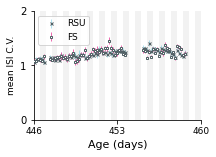

In [8]:
fig,ax = plt.subplots(figsize=[3,2]) 
strip = 0

#df_CV = []
#df_CV = df_CV_young_wt
#celltypestring = 'ensemble'
#make_combined_cv_plot(df_CV, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = df_CV_young_wt.iloc[np.where(df_FR_young_wt.fr < 5)[0]]
df_CV = []
df_CV = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
make_combined_cv_plot(df_CV, mean_or_median, today, basedir, celltypestring, SAVEFIGS)

df_CV = []
df_CV = df_CV_young_wt[(df_CV_young_wt.cv_cellqual <3) & (df_CV_young_wt.cv_celltype == 'FS')]
celltypestring = 'just_FS'
make_combined_cv_plot(df_CV, mean_or_median, today, basedir, celltypestring, SAVEFIGS)
 
plt.xlabel('Age (days)', fontsize=11)
plt.ylabel(f'{mean_or_median} ISI C.V.', fontsize=9)
starting_age = round(np.min(df_CV_young_wt.age_days))
plt.xticks([0,7*6,14*6],[str(starting_age),str(starting_age+7),str(starting_age+14)], fontsize = 9)
ax.set_yticks([0,1,2,3],fontsize = 9)
ax.set_ylim([0, 2])
plt.xlim([0, 84])
sns.despine(ax=ax) 
plt.legend(fontsize=9)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_{which_example_wt}_{mean_or_median}_CV_all_celltypes_onefigure.pdf')
    
    

# Make combined CV plot for example old TE4:

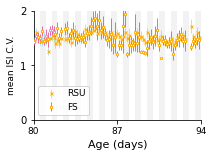

In [9]:
fig,ax = plt.subplots(figsize=[3,2]) 
swarm = 0

#df_CV = []
#df_CV = df_CV_te4
#celltypestring = 'ensemble'
#make_combined_cv_plot(df_CV, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = df_CV_te4.iloc[np.where(df_FR_old_te4.fr < 5)[0]]
df_CV = []
df_CV = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
df_CV = df_CV.sort_values(by='age_days')
celltypestring = 'just_RSU'
make_combined_cv_plot(df_CV, mean_or_median, today, basedir, celltypestring, SAVEFIGS)

df_CV = []
df_CV = df_CV_te4[(df_CV_te4.cv_cellqual <3) & (df_CV_te4.cv_celltype == 'FS')]
df_CV = df_CV.sort_values(by='age_days')
celltypestring = 'just_FS'
make_combined_cv_plot(df_CV, mean_or_median, today, basedir, celltypestring, SAVEFIGS)
 
plt.xlabel('Age (days)', fontsize=11)
plt.ylabel(f'{mean_or_median} ISI C.V.', fontsize=9)
starting_age = round(np.min(df_FR_old_te4.age_days))
plt.xticks([0,7*6,14*6],[str(starting_age),str(starting_age+7),str(starting_age+14)], fontsize = 9)
ax.set_yticks([0,1,2,3],fontsize = 9)
ax.set_ylim([0, 2])
plt.xlim([0, 84])
sns.despine(ax=ax) 
plt.legend(fontsize=9)

if SAVEFIGS:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_{which_te4_animal}_{mean_or_median}_CV_all_celltypes_onefigure.pdf')
    
    

# Make KDE plots for ISI CV distributions for ensemble, RSU, and FS:

ensemble
just_RSU
just_FS


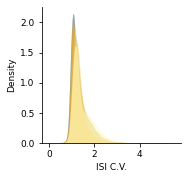

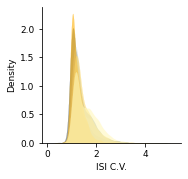

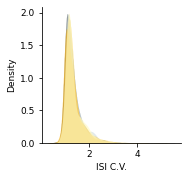

In [15]:
def plotKDE(df_, today, basedir, celltypestring, SAVEFIGS):

    print(celltypestring)
    fig, ax = plt.subplots(figsize=[2.5,2.5])

    p =['wt', 'te4']
    q = (['#cfdce1', '#8f9da2', '#536267'], ['#fff8bd', '#fbd86e', '#feb209'])
    r = zip(p,q)

    for gt in r:
        sns.kdeplot(data=df_[df_['cv_geno']==gt[0]], x='cv', hue='bins', fill=True, common_norm=False,
            palette= gt[1], alpha=.6, linewidth=0.1, log_scale = False, ax = ax)

    ax.set_xlabel('ISI C.V.',fontsize=9)
    ax.set_ylabel('Density', fontsize=9)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    ax.get_legend().remove()

    sns.despine()

    if SAVEFIGS:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_cv_kde_{celltypestring}.pdf')

df_ = dfall_CV
celltypestring = 'ensemble'
plotKDE(df_, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr < 5)[0]]
df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
plotKDE(df_, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr > 0)[0]]
df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'FS')]
celltypestring = 'just_FS'
plotKDE(df_, today, basedir, celltypestring, SAVEFIGS)


# Or if you'd prefer to plot this data as boxens:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


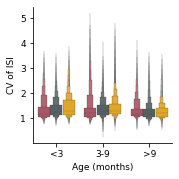

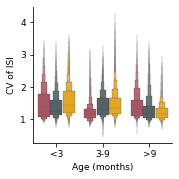

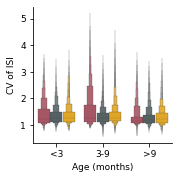

In [5]:
def plotboxen(df_, today, basedir, celltypestring, SAVEFIGS):
    
    plt.figure(figsize=[2.5,2.5])
    col_palette = [sns.xkcd_rgb['dark rose'], sns.xkcd_rgb['gunmetal'], sns.xkcd_rgb['saffron']]

    ax = sns.boxenplot(x = 'bins', y = 'cv', hue = 'cv_geno', showfliers=False, palette = col_palette, data=df_, linewidth = 0.25)

    plt.xticks([0,1,2],['<3','3-9','>9'], fontsize=9)
    plt.xlabel('Age (months)', fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel('CV of ISI', fontsize=9)
    ax.get_legend().remove()

    sns.despine()

    if SAVEFIGS:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_boxen_CVs_{celltypestring}.pdf')

df_ = dfall_CV
celltypestring = 'ensemble'
plotboxen(df_, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr < 5)[0]]
df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
plotboxen(df_, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr > 0)[0]]
df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'FS')]
celltypestring = 'just_FS'
plotboxen(df_, today, basedir, celltypestring, SAVEFIGS)



# CV by SW boxplots:

In [6]:
df_all = pd.read_pickle('/media/HlabShare/james_work/CV_by_SW_kiranmodel_FILTERED_5SDs_v4.pkl')

df_all = df_all.drop_duplicates()
df_all = df_all.dropna()
#df_all['geno'] = df_all['geno'].replace('e4', 'wt')

bins = [0, 90, 274, float('inf')]  
labels = ['young', 'mid', 'old']
df_all['age_group'] = pd.cut(df_all['age_days'], bins=bins, labels=labels, right=False)


/hlabhome/wg-mjames/tmp/ebgt/ipykernel_914/3463401768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)


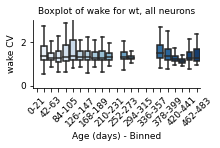

/hlabhome/wg-mjames/tmp/ebgt/ipykernel_914/3463401768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)


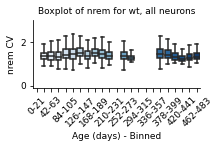

/hlabhome/wg-mjames/tmp/ebgt/ipykernel_914/3463401768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)


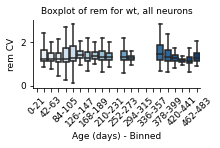

/hlabhome/wg-mjames/tmp/ebgt/ipykernel_914/3463401768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)


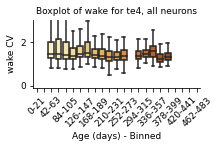

/hlabhome/wg-mjames/tmp/ebgt/ipykernel_914/3463401768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)


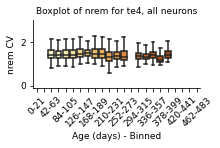

/hlabhome/wg-mjames/tmp/ebgt/ipykernel_914/3463401768.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)


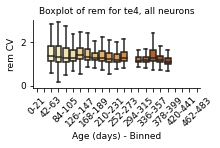

In [11]:
which_cell_type = 'all' # all, principal, or fs

def make_cv_sw_boxplot(which_state, which_geno, which_cell_type, SAVEFIGS):
    #Create bins for age_days
    
    dayz_binz = 21
    bin_edges = np.arange(0, 500, dayz_binz)
    labels = ['{}-{}'.format(edge, edge + dayz_binz) for edge in bin_edges[:-1]]

    #df_all Filter the dataframe for geno and cell type
    if which_cell_type == 'all':
        filtered_df = df_all[(df_all['geno'] == which_geno)]
    elif which_cell_type == 'principal':
        filtered_df = df_all[(df_all['geno'] == which_geno) & (df_all['cell_type'] == 'principal')]
    elif which_cell_type == 'fs':
        filtered_df = df_all[(df_all['geno'] == which_geno) & (df_all['cell_type'] == 'fs')]
    
    # Bin the age_days into intervals
    filtered_df['age_bin'] = pd.cut(filtered_df['age_days'], bins=bin_edges, labels=labels)

    # Create the boxplot
    
    if which_geno == 'wt':
        use_this_palette = 'Blues'
    elif which_geno == 'te4':
        use_this_palette = 'YlOrBr'
        
    plt.figure(figsize=[3,1.25])

    #which_state = 'wake'  # Change this to 'nrem' or 'rem' as needed
    filtered_state_df = filtered_df[filtered_df['state'] == which_state]
    sns.boxplot(x="age_bin", y="ISI_CVs", data=filtered_state_df, palette=use_this_palette, showfliers=False)
    
    # sns.boxplot(x="age_bin", y=which_state, data=filtered_df, palette = use_this_palette, showfliers=False)

    # Add labels and title to the plot
    plt.xlabel("Age (days)", fontsize=9)
    plt.ylabel(f"{which_state} CV", fontsize=9)
    plt.yticks(fontsize=9)
    plt.title(f"Boxplot of {which_state} for {which_geno}, {which_cell_type} neurons", fontsize=9)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    # Get the current tick labels
    tick_labels = plt.gca().get_xticklabels()

    # Iterate over the tick labels and modify their visibility
    for i, label in enumerate(tick_labels):
        if i % 2 != 0:  # Skip every other label
            label.set_visible(False)

    # Update the tick labels
    plt.gca().set_xticklabels(tick_labels, fontsize=9)
    
    
    if which_cell_type == 'all':
        plt.ylim([-.1,3])
    elif which_cell_type == 'principal':
        plt.ylim([-.1,3])
    elif which_cell_type == 'fs':
        plt.ylim([-.1,3])
        
    sns.despine()

    if SAVEFIGS:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_SW_CV_{which_geno}_{which_cell_type}_{which_state}.pdf')
        
    # Display the plot
    plt.show()

    return filtered_df


for which_state in ['wake', 'nrem', 'rem']:
    which_geno = 'wt'
    filtered_df = make_cv_sw_boxplot(which_state, which_geno, which_cell_type, SAVEFIGS)
      
for which_state in ['wake', 'nrem', 'rem']:
    which_geno = 'te4'
    filtered_df = make_cv_sw_boxplot(which_state, which_geno, which_cell_type, SAVEFIGS)

# LME on CV by SW data:

In [12]:
df_all = pd.read_pickle('/media/HlabShare/james_work/CV_by_SW_kiranmodel_FILTERED_5SDs_v4.pkl')

df_all = df_all.drop_duplicates()
df_all = df_all.dropna()
#df_all['geno'] = df_all['geno'].replace('e4', 'wt')

bins = [0, 90, 274, float('inf')]  
labels = ['young', 'mid', 'old']
df_all['age_group'] = pd.cut(df_all['age_days'], bins=bins, labels=labels, right=False)

which_neuron_type = 'all' #'all', 'principal', or 'fs'
combine_e4_and_wt = 'yes' #'yes' or 'no'

df_stats = df_all
# df_stats = []
# if which_neuron_type == 'all':
#     df_stats = df_all #All neurons
# elif which_neuron_type == 'principal':
#     df_stats = df_all[(df_all['peaklatency'] > 0.3) & (df_all['fr'] < 5)] #Principal only
# elif which_neuron_type == 'fs':
#     df_stats = df_all[(df_all['peaklatency'] < 0.3)] #FS only
    
if combine_e4_and_wt == 'yes':
    df_stats['geno'] = df_stats['geno'].replace('e4', 'wt')

df_stats = df_stats.sort_values(by='geno', ascending=False)

if len(df_stats.geno.unique()) == 3:
    df_stats['geno'] = pd.Categorical(df_stats['geno'], categories=['wt', 'te4', 'e4'], ordered=False)
elif len(df_stats.geno.unique()) == 2:
    df_stats['geno'] = pd.Categorical(df_stats['geno'], categories=['wt', 'te4'], ordered=False)


df_stats.to_csv('/media/HlabShare/te4_manuscript_james/manuscript_folders/CV_by_SW_grouped_e4_wt.csv')


In [14]:
df_stats

,pk_latency,overall_fr,presence_ratio,age_days,animal,geno,neuron_number,age_group,state,ISI_CVs
0,0.48,6.721016,1.0,202.209306,CAF00042,wt,0,mid,wake,1.231400
160583,0.16,4.383611,1.0,153.644815,CAF00034,wt,289,mid,nrem,1.181098
160613,0.56,2.733507,1.0,154.315382,CAF00034,wt,319,mid,nrem,1.264046
160614,0.16,6.324653,1.0,154.315382,CAF00034,wt,320,mid,nrem,1.211269
160615,0.16,8.562812,1.0,154.315382,CAF00034,wt,321,mid,nrem,1.195569
...,...,...,...,...,...,...,...,...,...,...
190440,0.76,8.436421,1.0,73.802037,CAF00060,te4,3433,young,nrem,1.360136
190441,0.80,0.212140,1.0,73.802037,CAF00060,te4,3434,young,nrem,1.444857
190442,0.84,0.506070,1.0,73.802037,CAF00060,te4,3435,young,nrem,1.689091
190443,0.40,0.413754,1.0,73.802037,CAF00060,te4,3437,young,nrem,1.541270


In [13]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

%load_ext rpy2.ipython
# Enable cell magic for Rpy2 interface

In [16]:
%%R

# load LMER libraries
library(tidyverse)
library(lme4)
library(lmerTest)
library(emmeans)
# load dataset in R
fn = '/media/HlabShare/te4_manuscript_james/manuscript_folders/CV_by_SW_grouped_e4_wt.csv'
cv_data <- read_csv(file = fn)

# Input the desired cell type to filter
desired_cell_type <- "all" # options you can use: ['principal', 'fs', 'other', 'all]

# Filter the data based on the desired cell type
if (desired_cell_type == 'all') {
  filtered_data <- cv_data
} else {
  filtered_data <- cv_data[cv_data$cell_type == desired_cell_type, ]
}

# # Create a subset of the dataframe based on the cell type
# if (desired_cell_type %in% fr_data$cell_type) {
#   filtered_data <- fr_data[fr_data$cell_type == desired_cell_type, ]
# } else {
#   # Handle the case when the desired cell type is not found
#   filtered_data <- NULL  # or any other appropriate action
# }

cv_lmer = lmer(ISI_CVs ~ age_group * geno  + (1|animal), data = filtered_data)


New names:
• `` -> `...1`
Rows: 303726 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): animal, geno, age_group, state
dbl (7): ...1, pk_latency, overall_fr, presence_ratio, age_days, neuron_numb...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
%%R 
# this will provide general information
summary(cv_lmer)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ISI_CVs ~ age_group * geno + (1 | animal)
   Data: filtered_data

REML criterion at convergence: 421431.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5309 -0.5890 -0.2632  0.2611 14.7793 

Random effects:
 Groups   Name        Variance Std.Dev.
 animal   (Intercept) 0.01783  0.1335  
 Residual             0.23430  0.4840  
Number of obs: 303726, groups:  animal, 38

Fixed effects:
                        Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            1.481e+00  5.053e-02  3.306e+01  29.317  < 2e-16 ***
age_groupold          -1.300e-01  8.411e-02  3.356e+01  -1.546    0.131    
age_groupyoung        -2.804e-02  4.567e-03  3.026e+05  -6.141 8.23e-10 ***
genowt                -2.823e-02  5.933e-02  3.346e+01  -0.476    0.637    
age_groupold:genowt    1.040e-01  1.017e-01  3.394e+01   1.022    0.314    
age_groupyoung:genowt -5.589e-02  6.270e-03  

In [ ]:
%%R
# This will give us feedback about whether the main effects are significant 
anova(cv_lmer)

In [ ]:
%%R
emmeans(cv_lmer, list(pairwise ~  geno : age_group), adjust = 'tukey')

# LME (on all CVs, not broken up by SW states):

In [19]:
dfall_CV

,index,cv,cv_cellid,cv_celltype,cv_peaklatency,cv_time,cv_animal,cv_cellqual,cv_cellcount,cv_geno,age_days,bins
0,0,1.104743,18,FS,0.28,4952093,caf100,2,34,e4,57.315891,Young
1,1,1.155937,18,FS,0.28,4959293,caf100,2,34,e4,57.399225,Young
2,2,1.125122,22,RSU,0.48,4952093,caf100,2,35,e4,57.315891,Young
3,3,1.066627,22,RSU,0.48,4959293,caf100,2,35,e4,57.399225,Young
4,4,0.993551,30,RSU,0.68,4952093,caf100,2,36,e4,57.315891,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
293612,20797,2.019650,352,RSU,0.84,8136495,caf60,1,19118,te4,94.172396,Mid
293613,20798,1.812025,353,RSU,0.88,8136495,caf60,1,19119,te4,94.172396,Mid
293614,20799,2.306945,357,RSU,0.72,8136495,caf60,1,19120,te4,94.172396,Mid
293615,20800,2.024471,358,RSU,0.76,8136495,caf60,1,19121,te4,94.172396,Mid


In [31]:
which_neuron_type = 'all' #'all', 'principal', or 'fs'
combine_e4_and_wt = 'yes' #'yes' or 'no'

#df_all = pd.read_pickle('/media/HlabShare/james_work/FR_by_SW_model_v3_20sec_min_bout.pkl')
df_all = dfall_CV
df_all = df_all.drop_duplicates()
df_all = df_all.dropna()

bins = [0, 90, 274, float('inf')]  
labels = ['young', 'mid', 'old']
df_all['age_group'] = pd.cut(df_all['age_days'], bins=bins, labels=labels, right=False)
#df_all = df_all[(df_all.presence_ratio > .99)]

df_stats = []
df_stats = df_all

if combine_e4_and_wt == 'yes':
    df_stats['cv_geno'] = df_stats['cv_geno'].replace('e4', 'wt')

df_stats = df_stats.sort_values(by='cv_geno', ascending=False)

if len(df_stats.cv_geno.unique()) == 3:
    df_stats['cv_geno'] = pd.Categorical(df_stats['cv_geno'], categories=['wt', 'te4', 'e4'], ordered=False)
elif len(df_stats.cv_geno.unique()) == 2:
    df_stats['cv_geno'] = pd.Categorical(df_stats['cv_geno'], categories=['wt', 'te4'], ordered=False)

df_stats

,index,cv,cv_cellid,cv_celltype,cv_peaklatency,cv_time,cv_animal,cv_cellqual,cv_cellcount,cv_geno,age_days,bins,age_group
0,0,1.104743,18,FS,0.28,4952093,caf100,2,34,wt,57.315891,Young,young
127005,12637,2.107092,132,FS,0.24,7540052,caf50,1,4819,wt,87.269120,Young,young
126996,12628,2.219269,130,FS,0.16,7547252,caf50,1,4817,wt,87.352454,Young,young
126997,12629,2.282934,130,FS,0.16,7554452,caf50,1,4817,wt,87.435787,Young,young
126998,12630,2.151616,130,FS,0.16,7561652,caf50,1,4817,wt,87.519120,Young,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146182,4383,1.417019,80,FS,0.16,18083328,caf52,1,868,te4,209.297778,Mid,mid
146183,4384,1.314126,80,FS,0.16,18090528,caf52,1,868,te4,209.381111,Mid,mid
146184,4385,1.386369,80,FS,0.16,18097728,caf52,1,868,te4,209.464444,Mid,mid
146185,4386,1.336378,80,FS,0.16,18104928,caf52,1,868,te4,209.547778,Mid,mid


In [29]:
df_stats.to_csv(f'/media/HlabShare/te4_manuscript_james/manuscript_folders/CV_all_data_not_SW_grouped_e4_wt.csv')


In [30]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import StrVector

%load_ext rpy2.ipython
# Enable cell magic for Rpy2 interface

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [32]:
%%R

# load LMER libraries
library(tidyverse)
library(lme4)
library(lmerTest)
library(emmeans)
# load dataset in R
fn = '/media/HlabShare/te4_manuscript_james/manuscript_folders/CV_all_data_not_SW_grouped_e4_wt.csv'
cv_data <- read_csv(file = fn)

cv_lmer = lmer(cv ~ age_group * cv_geno  + (1|cv_animal), data = cv_data)


New names:
• `` -> `...1`
Rows: 293617 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): cv_celltype, cv_animal, cv_geno, bins, age_group
dbl (9): ...1, index, cv, cv_cellid, cv_peaklatency, cv_time, cv_cellqual, c...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R 
# this will provide general information
summary(cv_lmer)

In [ ]:
%%R
# This will give us feedback about whether the main effects are significant 
anova(cv_lmer)

In [ ]:
%%R
emmeans(cv_lmer, list(pairwise ~  geno : age_group), adjust = 'tukey')

# EXTRA:

In [ ]:
which_neuron_type = 'fs' #'all', 'principal', or 'fs'
combine_e4_and_wt = 'no' #'yes' or 'no'

#df_all = pd.read_pickle('/media/HlabShare/james_work/FR_by_SW_model_v3_20sec_min_bout.pkl')
df_all = dfall_CV
df_all.drop_duplicates()
df_all = df_all.dropna()

bins = [0, 90, 274, float('inf')]  
labels = ['young', 'mid', 'old']
df_all['age_group'] = pd.cut(df_all['age_days'], bins=bins, labels=labels, right=False)
#df_all = df_all[(df_all.presence_ratio > .99)]

df_stats = []
if which_neuron_type == 'all':
    df_stats = df_all #All neurons
elif which_neuron_type == 'principal':
    
    
    df_stats = df_all[(df_all['cv_peaklatency'] > 0.3) & (df_all['fr'] < 5)] #Principal only
    
    
    tmpdf = []
    tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr < 5)[0]]
    df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]


elif which_neuron_type == 'fs':
    df_stats = df_all[(df_all['cv_peaklatency'] < 0.3)] #FS only
    
if combine_e4_and_wt == 'yes':
    df_stats['cv_geno'] = df_stats['cv_geno'].replace('e4', 'wt')

df_stats = df_stats.sort_values(by='cv_geno', ascending=False)

if len(df_stats.geno.unique()) == 3:
    df_stats['cv_geno'] = pd.Categorical(df_stats['cv_geno'], categories=['wt', 'te4', 'e4'], ordered=False)
elif len(df_stats.geno.unique()) == 2:
    df_stats['cv_geno'] = pd.Categorical(df_stats['cv_geno'], categories=['wt', 'te4'], ordered=False)

print('')
print('LME for CVs, using categorical age_group (Young, Mid, Old):')
model = smf.mixedlm("cv ~ cv_geno * age_group", df_stats, groups=df_stats['cv_animal'])
result = model.fit()
print(result.summary())

print('')
print('')
print('LME for CVs, using numerical age_days:')
model = smf.mixedlm("cv ~ cv_geno * age_days", df_stats, groups=df_stats['cv_animal'])
result = model.fit()
print(result.summary())



In [7]:
dfall_CV

,index,cv,cv_cellid,cv_celltype,cv_peaklatency,cv_time,cv_animal,cv_cellqual,cv_cellcount,cv_geno,age_days,bins
0,0,1.104743,18,FS,0.28,4952093,caf100,2,34,e4,57.315891,Young
1,1,1.155937,18,FS,0.28,4959293,caf100,2,34,e4,57.399225,Young
2,2,1.125122,22,RSU,0.48,4952093,caf100,2,35,e4,57.315891,Young
3,3,1.066627,22,RSU,0.48,4959293,caf100,2,35,e4,57.399225,Young
4,4,0.993551,30,RSU,0.68,4952093,caf100,2,36,e4,57.315891,Young
...,...,...,...,...,...,...,...,...,...,...,...,...
293612,20797,2.019650,352,RSU,0.84,8136495,caf60,1,19118,te4,94.172396,Mid
293613,20798,1.812025,353,RSU,0.88,8136495,caf60,1,19119,te4,94.172396,Mid
293614,20799,2.306945,357,RSU,0.72,8136495,caf60,1,19120,te4,94.172396,Mid
293615,20800,2.024471,358,RSU,0.76,8136495,caf60,1,19121,te4,94.172396,Mid


# Measure ISI C.V. by sleep and wake states:

In [5]:
SW = pd.read_pickle(f'/{basedir}/HlabShare/james/SW_array_FINAL.pkl')


In [7]:
wake_dense_threshold = 0.75

SW_CV = pd.DataFrame()

df_SW_tmp = SW
df_SW_tmp = df_SW_tmp.replace('E4', 'WT')

for ii in np.arange(0,len(df_SW_tmp)):

    which_day = ii
    wake_dense_FRs_thisanimal = []
    sleep_dense_FRs_thisanimal = []
    wake_dense_celltypes_thisanimal = []

    startpt = df_SW_tmp.iloc[which_day]['Age']
    endpt = df_SW_tmp.iloc[which_day]['Age'] + len(df_SW_tmp.iloc[which_day]['SW Array'])*4/3600/24
    thisdaydf = []
    thisdaydf = dfall_CV[(dfall_CV.cv_animal == df_SW_tmp.iloc[which_day]['Animal'].lower()) & (dfall_CV.age_days > startpt) & 
                     (dfall_CV.age_days < endpt)]

    two_hr_bins = np.arange(0/24,(endpt - startpt),2/24)
    for b in np.arange(0,len(two_hr_bins)):
        tmpdf = []
        tmpdf = thisdaydf[(thisdaydf.age_days > startpt + two_hr_bins[b]) & (thisdaydf.age_days < startpt + two_hr_bins[b] + 2/24)]

        if len(tmpdf) > 0:
            tmp_states = []
            tmp_states = df_SW_tmp.iloc[which_day]['SW Array'][1800*b:1800*(b+1)]

            tmp_percwake = []
            tmp_percwake = len(tmp_states[np.logical_or(tmp_states == 1, tmp_states == 5)])/len(tmp_states)

            tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
            if tmp_percwake > wake_dense_threshold:
                tmpdf.loc[:,'state_density']= ['wake_dense']*len(tmpdf)
            elif tmp_percwake < (1-wake_dense_threshold):
                tmpdf.loc[:,'state_density']= ['sleep_dense']*len(tmpdf)
            else:
                 tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
                    
                    
        SW_CV = pd.concat([SW_CV, tmpdf])
          
#SW_FR['state_density'] = pd.cut(x = SW_FR['percent_wake'], bins=[0, .3, .66, 1], 
#                              labels = ['sleep_dense','middle','wake_dense'])
                              
SW_CV = SW_CV.replace('E4', 'WT')
SW_CV = SW_CV.replace('e4', 'wt')



/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['wake_dense']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['sleep_dense']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['medium']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['sleep_dense']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['wake_dense']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'percent_wake']= [tmp_percwake]*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf.loc[:,'state_density']= ['wake_dense']*len(tmpdf)
/hlabhome/wg-mjames/tmp/2XgN/ipykernel_36335/3434499130.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [8]:
SW_CV

,index,cv,cv_cellid,cv_celltype,cv_peaklatency,cv_time,cv_animal,cv_cellqual,cv_cellcount,cv_geno,age_days,bins,percent_wake,state_density
89519,16361,1.264947,0,RSU,0.48,7331214,caf49,2,8566,te4,84.852014,Young,0.756667,wake_dense
89524,16366,1.139119,7,RSU,0.40,7331214,caf49,2,8567,te4,84.852014,Young,0.756667,wake_dense
89529,16371,1.231235,11,FS,0.16,7331214,caf49,1,8568,te4,84.852014,Young,0.756667,wake_dense
89534,16376,1.057883,12,FS,0.28,7331214,caf49,2,8569,te4,84.852014,Young,0.756667,wake_dense
89539,16381,1.091570,14,FS,0.28,7331214,caf49,2,8570,te4,84.852014,Young,0.756667,wake_dense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54269,3869,1.066784,189,RSU,0.32,32854196,caf37,2,1193,te4,380.256898,Old,0.445000,medium
54272,3872,1.376047,190,FS,0.16,32854196,caf37,2,1194,te4,380.256898,Old,0.445000,medium
54275,3875,1.005100,196,FS,0.24,32854196,caf37,2,1195,te4,380.256898,Old,0.445000,medium
54278,3878,1.147976,198,RSU,0.48,32854196,caf37,2,1196,te4,380.256898,Old,0.445000,medium


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TE4 p = 1.5191149581908662e-05
WT p = 0.545064742409997
TE4 p = 0.16589788779047004
WT p = 0.0038509896705756926
TE4 p = 0.032183351973672426
WT p = 0.6164809656479047
TE4 p = 0.0005981602532899963
WT p = 0.609719689676329


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TE4 p = 0.042798701297789656
WT p = 2.836938299923968e-07
TE4 p = 0.10927999645797704
WT p = 0.9044738648410223
TE4 p = 0.014805201956780421
WT p = 0.7308367178244132
TE4 p = 0.7043270813101226
WT p = 0.08241027253542818
TE4 p = 0.146897865963722
WT p = 0.701345365326062


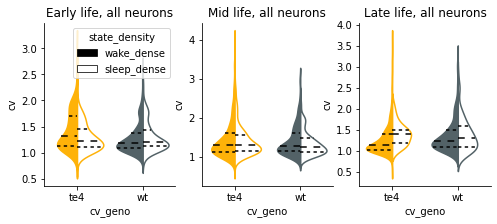

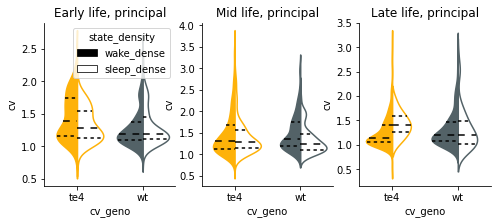

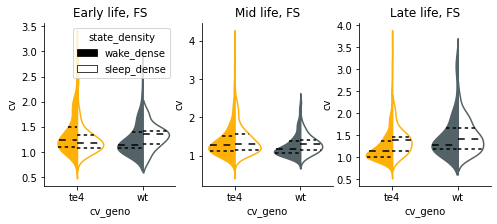

In [12]:
col_palette = {'wake_dense': sns.xkcd_rgb['black'], 'sleep_dense': sns.xkcd_rgb['white']}

def run_stats_on_statedense(tmp_stats_SW):
    wake_stats = []
    sleep_stats = []
    wake_stats = np.array(tmp_stats_SW[(tmp_stats_SW.state_density == 'wake_dense') 
                                         & (tmp_stats_SW.cv_geno == 'te4')].cv)
    sleep_stats = np.array(tmp_stats_SW[(tmp_stats_SW.state_density == 'sleep_dense') 
                                         & (tmp_stats_SW.cv_geno == 'te4')].cv)
    print(f'TE4 p = {str(scipy.stats.ttest_ind(wake_stats, sleep_stats)[1])}')
    wake_stats = []
    sleep_stats = []
    wake_stats = np.array(tmp_stats_SW[(tmp_stats_SW.state_density == 'wake_dense') 
                                         & (tmp_stats_SW.cv_geno == 'wt')].cv)
    sleep_stats = np.array(tmp_stats_SW[(tmp_stats_SW.state_density == 'sleep_dense') 
                                         & (tmp_stats_SW.cv_geno == 'wt')].cv)
    print(f'WT p = {str(scipy.stats.ttest_ind(wake_stats, sleep_stats)[1])}')
    

def make_violin_plots(tmp_SW_df, col_palette, axcoord):
    
    run_stats_on_statedense(tmp_SW_df)
    
    sns.violinplot(data = tmp_SW_df, x = 'cv_geno', y = 'cv', cut=2, hue= 'state_density', 
                   palette = col_palette, split=True, ax=ax[axcoord], inner="quartile")
    if axcoord == 0:
        plt.legend(fontsize=9)
    else:
        ax[axcoord].get_legend().remove()
    for ind, violin in enumerate(ax[axcoord].findobj(PolyCollection)):
        if ind == 0:
            violin.set_facecolor(sns.xkcd_rgb['saffron'])
            violin.set_edgecolor(sns.xkcd_rgb['saffron'])
        elif ind == 1:
            violin.set_facecolor(sns.xkcd_rgb['white'])
            violin.set_edgecolor(sns.xkcd_rgb['saffron'])
        elif ind == 2:
            violin.set_facecolor(sns.xkcd_rgb['gunmetal'])
            violin.set_edgecolor(sns.xkcd_rgb['gunmetal'])
        elif ind == 3:
            violin.set_facecolor(sns.xkcd_rgb['white'])
            violin.set_edgecolor(sns.xkcd_rgb['gunmetal'])
        
fig, ax = plt.subplots(1, 3, figsize=[8,3])
plotting_SW_FR = SW_CV[(SW_CV.state_density != 'medium')]

for i,j in enumerate(plotting_SW_FR.bins.unique()):
    tmp_SW_df = plotting_SW_FR[(plotting_SW_FR.bins == j)]
    make_violin_plots(tmp_SW_df, col_palette, i)
ax[0].title.set_text('Early life, all neurons')
ax[1].title.set_text('Mid life, all neurons')
ax[2].title.set_text('Late life, all neurons')
sns.despine()

fig, ax = plt.subplots(1, 3, figsize=[8,3])
plotting_SW_FR = SW_CV[(SW_CV.state_density != 'medium') & (SW_CV.cv_celltype == 'RSU')]

for i,j in enumerate(plotting_SW_FR.bins.unique()):
    tmp_SW_df = plotting_SW_FR[(plotting_SW_FR.bins == j)]
    make_violin_plots(tmp_SW_df, col_palette, i)
ax[0].title.set_text('Early life, principal')
ax[1].title.set_text('Mid life, principal')
ax[2].title.set_text('Late life, principal') 
sns.despine()

fig, ax = plt.subplots(1, 3, figsize=[8,3])
plotting_SW_FR = SW_CV[(SW_CV.state_density != 'medium') & (SW_CV.cv_celltype == 'FS')]

for i,j in enumerate(plotting_SW_FR.bins.unique()):
    tmp_SW_df = plotting_SW_FR[(plotting_SW_FR.bins == j)]
    make_violin_plots(tmp_SW_df, col_palette, i)
ax[0].title.set_text('Early life, FS')
ax[1].title.set_text('Mid life, FS')
ax[2].title.set_text('Late life, FS') 
sns.despine()



# Now for supplemental figures and stats plots:

# ISI CV boxen plots:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


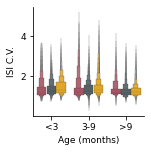

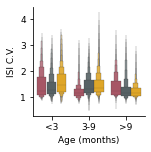

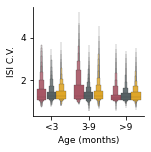

In [6]:
def plotboxen_cv(df_, today, basedir, celltypestring, SAVEFIGS):

    plt.figure(figsize=[2,2])
    col_palette = [sns.xkcd_rgb['dark rose'], sns.xkcd_rgb['gunmetal'], sns.xkcd_rgb['saffron']]

    ax = sns.boxenplot(x = 'bins', y = 'cv', hue = 'cv_geno', showfliers=False, palette = col_palette, data=df_, linewidth = 0.25)

    plt.xticks([0,1,2],['<3','3-9','>9'], fontsize=9)
    plt.xlabel('Age (months)', fontsize=9)
    plt.yticks(fontsize=9)
    plt.ylabel('ISI C.V.', fontsize=9)
    ax.get_legend().remove()
    sns.despine()

    if SAVEFIGS == 1:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_boxen_CVs_{celltypestring}.pdf')
        
df_ = dfall_CV
celltypestring = 'ensemble'
plotboxen_cv(df_, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr < 5)[0]]
df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
plotboxen_cv(df_, today, basedir, celltypestring, SAVEFIGS)

df_ = dfall_CV[(dfall_CV.cv_cellqual <3) & (dfall_CV.cv_celltype == 'FS')]
celltypestring = 'just_FS'
plotboxen_cv(df_, today, basedir, celltypestring, SAVEFIGS)



# STOP HERE, STILL WORKING ON THE REST OF THE NOTEBOOK:

# ISI CV LME pvalue plots:

In [ ]:
fig, ax = plt.subplots(figsize=[2.5, 2.5])

celltypestring = 'ensemble'
#Previous run of LME:
#fr_young = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_1/fr_young.csv')
#fr_mid = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_1/fr_mid.csv')
#fr_old = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/te4_figure_1/fr_old.csv')

#Newest:
fr_young = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_young_ensemble.csv')
fr_mid = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_mid_ensemble.csv')
fr_old = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_old_ensemble.csv')

tempdf = pd.DataFrame()
ps = np.concatenate([np.array(fr_young.x), np.array(fr_mid.x), np.array(fr_old.x)])
xs = np.concatenate([np.ones(len(fr_young.x))*0, np.ones(len(fr_mid.x))*.5, np.ones(len(fr_old.x))*1])
data = {'Xvals': xs,
        'Data': ps}
tempdf = pd.DataFrame(data) 

sns.stripplot(data=tempdf, x="Xvals", y="Data", size=3, color = 'black', alpha=0.3)
sns.boxplot(data=tempdf, x="Xvals", y="Data", width = 0.4, palette = 'Blues', showfliers=False)
plt.hlines(0.05, -0.5, 2.5, linestyle='--', color='red')

plt.xticks(ticks= [0,1,2],labels=['<3','3-9','>9'], fontsize=9)
plt.yticks(ticks= np.arange(0,1.1,.2), fontsize=10)
plt.xlabel('Animal age (months)', fontsize=9)
plt.ylabel('P values', fontsize=9)
plt.xlim(-0.5,2.5)
plt.ylim(0, 1.0)

#plt.gcf().subplots_adjust(left=0.2)

sns.despine(ax=ax)

if SAVEFIGS == 1:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig2_figures/{today}_LME_FRs_pvals_{celltypestring}.pdf')

# --------------------------------------------------------------------------------------------------------    
fig, ax = plt.subplots(figsize=[2.5, 2.5])
celltypestring = 'just_RSU'

fr_young = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_young_RSU.csv')
fr_mid = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_mid_RSU.csv')
fr_old = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_old_RSU.csv')

tempdf = pd.DataFrame()
ps = np.concatenate([np.array(fr_young.x), np.array(fr_mid.x), np.array(fr_old.x)])
xs = np.concatenate([np.ones(len(fr_young.x))*0, np.ones(len(fr_mid.x))*.5, np.ones(len(fr_old.x))*1])
data = {'Xvals': xs,
        'Data': ps}
tempdf = pd.DataFrame(data) 

sns.stripplot(data=tempdf, x="Xvals", y="Data", size=3, color = 'black', alpha=0.3)
sns.boxplot(data=tempdf, x="Xvals", y="Data", width = 0.4, palette = 'Blues', showfliers=False)
plt.hlines(0.05, -0.5, 2.5, linestyle='--', color='red')

plt.xticks(ticks= [0,1,2],labels=['<3','3-9','>9'], fontsize=9)
plt.yticks(ticks= np.arange(0,1.1,.2), fontsize=10)
plt.xlabel('Animal age (months)', fontsize=9)
plt.ylabel('P values', fontsize=9)
plt.xlim(-0.5,2.5)
plt.ylim(0, 1.0)

#plt.gcf().subplots_adjust(left=0.2)

sns.despine(ax=ax)

if SAVEFIGS == 1:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig2_figures/{today}_LME_FRs_pvals_{celltypestring}.pdf')

# --------------------------------------------------------------------------------------------------------    
fig, ax = plt.subplots(figsize=[2.5, 2.5])
celltypestring = 'just_FS'

fr_young = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_young_FS.csv')
fr_mid = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_mid_FS.csv')
fr_old = pd.read_csv(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/FINAL_fr_old_FS.csv')

tempdf = pd.DataFrame()
ps = np.concatenate([np.array(fr_young.x), np.array(fr_mid.x), np.array(fr_old.x)])
xs = np.concatenate([np.ones(len(fr_young.x))*0, np.ones(len(fr_mid.x))*.5, np.ones(len(fr_old.x))*1])
data = {'Xvals': xs,
        'Data': ps}
tempdf = pd.DataFrame(data) 

sns.stripplot(data=tempdf, x="Xvals", y="Data", size=3, color = 'black', alpha=0.3)
sns.boxplot(data=tempdf, x="Xvals", y="Data", width = 0.4, palette = 'Blues', showfliers=False)
plt.hlines(0.05, -0.5, 2.5, linestyle='--', color='red')
plt.xticks(ticks= [0,1,2],labels=['<3','3-9','>9'], fontsize=9)
plt.yticks(ticks= np.arange(0,1.1,.2), fontsize=10)
plt.xlabel('Animal age (months)', fontsize=9)
plt.ylabel('P values', fontsize=9)
plt.xlim(-0.5,2.5)
plt.ylim(0, 1.0)

#plt.gcf().subplots_adjust(left=0.2)

sns.despine(ax=ax)

if SAVEFIGS == 1:
    plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig2_figures/{today}_LME_FRs_pvals_{celltypestring}.pdf')

# --------------------------------------------------------------------------------------------------------    

    

# ISI CV Hierarchical bootstrap:

In [ ]:
def plothierbootstrap(df_, today, basedir, celltypestring, SAVEFIGS):

    bins = [0, 91, 274, 700]

    wt_mean = []
    wt_sem = []
    te4_mean = []
    te4_sem = []
    e4_mean = []
    e4_sem = []
    num_wts = []
    num_te4s = []
    num_e4s = []

    for h in np.arange(0,len(bins)-1):

        try:

            thisdf = []
            thisdf = df_[df_.age_days > bins[h]]
            thisdf = df_[df_.age_days < bins[h+1]]

            animal_array_temp = thisdf.animal.unique()

            wt_temp = []
            te4_temp = []
            e4_temp = []

            for a in animal_array_temp:
                temparray = []
                temparray = thisdf[thisdf.animal == a]

                if temparray.geno.unique()[0] == 'wt':
                    wt_temp.append(np.asarray(temparray.fr))
                elif temparray.geno.unique()[0] == 'te4':
                    te4_temp.append(np.asarray(temparray.fr))
                elif temparray.geno.unique()[0] == 'e4':
                    e4_temp.append(np.asarray(temparray.fr))


            num_wts.append(len(wt_temp))
            num_te4s.append(len(te4_temp))
            num_e4s.append(len(e4_temp))

            nboot = 10000 

            bootstrapping_matrix1 = np.zeros([nboot,1,len(wt_temp)])
            for a in np.arange(0,len(wt_temp)): #loop thru number of te4 animals
                temp = []
                temp = wt_temp[a]
                for n in np.arange(0,nboot):
                    bootstrapping_matrix1[n,0,a] = choices(temp, k=1)[0]

            bootstrapping_matrix2 = np.zeros([nboot,1,len(te4_temp)])
            for a in np.arange(0,len(te4_temp)): #loop thru number of te4 animals
                temp = []
                temp = te4_temp[a]
                for n in np.arange(0,nboot):
                    bootstrapping_matrix2[n,0,a] = choices(temp, k=1)[0]


            bootstrapping_matrix3 = np.zeros([nboot,1,len(e4_temp)])
            for a in np.arange(0,len(e4_temp)): #loop thru number of e4 animals
                temp = []
                temp = e4_temp[a]
                for n in np.arange(0,nboot):
                    bootstrapping_matrix3[n,0,a] = choices(temp, k=1)[0]


            nboot2 = 300 #Only repeating 300 times since the actual variance is in the previous step.
            bootstats1 = np.zeros([nboot2,1])
            bootstats2 = np.zeros([nboot2,1])
            bootstats3 = np.zeros([nboot2,1])

            for n in np.arange(0,nboot2):
                temp_animals = []
                temp_animals = choices(np.arange(0,len(wt_temp)), k=3)

                tempdata = []
                for t in np.arange(0,len(temp_animals)):

                    temp_pulls = choices(np.arange(0,nboot), k=nboot)
                    tempdata.append(bootstrapping_matrix1[temp_pulls,:,temp_animals[t]])
                    #temp_data = vertcat(temp_data,bootstrapping_matrix1(temp_pulls,:,temp_UL_birds(t))); 
                    #tempdata = np.vstack(tempdata, bootstrapping_matrix1[temp_pulls,:,temp_UL_birds[t]])

                #wt_boot_means.append(np.nanmean(tempdata))
                bootstats1[n] = np.nanmean(tempdata)


            for n in np.arange(0,nboot2):
                temp_animals =[]
                temp_animals = choices(np.arange(0,len(te4_temp)), k=3)

                tempdata = []
                for t in np.arange(0,len(temp_animals)):

                    temp_pulls = choices(np.arange(0,nboot), k=nboot)
                    tempdata.append(bootstrapping_matrix2[temp_pulls,:,temp_animals[t]])
                    #temp_data = vertcat(temp_data,bootstrapping_matrix1(temp_pulls,:,temp_UL_birds(t))); 
                    #tempdata = np.vstack(tempdata, bootstrapping_matrix1[temp_pulls,:,temp_UL_birds[t]])

                #wt_boot_means.append(np.nanmean(tempdata))
                bootstats2[n] = np.nanmean(tempdata)

            for n in np.arange(0,nboot2):
                temp_animals = []
                temp_animals = choices(np.arange(0,len(e4_temp)), k=3)

                tempdata = []
                for t in np.arange(0,len(temp_animals)):

                    temp_pulls = choices(np.arange(0,nboot), k=nboot)
                    tempdata.append(bootstrapping_matrix3[temp_pulls,:,temp_animals[t]])
                    #temp_data = vertcat(temp_data,bootstrapping_matrix1(temp_pulls,:,temp_UL_birds(t))); 
                    #tempdata = np.vstack(tempdata, bootstrapping_matrix1[temp_pulls,:,temp_UL_birds[t]])

                #wt_boot_means.append(np.nanmean(tempdata))
                bootstats3[n] = np.nanmean(tempdata)

            bootstats1 = bootstats1.flatten()
            bootstats2 = bootstats2.flatten()
            bootstats3 = bootstats3.flatten()

            wt_mean.append(np.nanmean(bootstats1))
            wt_sem.append(np.nanstd(bootstats1))
            te4_mean.append(np.nanmean(bootstats2))
            te4_sem.append(np.nanstd(bootstats2))
            e4_mean.append(np.nanmean(bootstats3))
            e4_sem.append(np.nanstd(bootstats3))

            sample1 = bootstats1
            sample2 = bootstats2

            joint_low_val = np.min([np.min(sample1), np.min(sample2)])
            joint_high_val = np.max([np.max(sample1), np.max(sample2)])

            p_joint_matrix = np.zeros([100,100])

            p_axis = np.arange(joint_low_val, joint_high_val, (joint_high_val - joint_low_val)/100)
            edge_shift = (p_axis[1] - p_axis[0])/2 
            p_axis_edges = p_axis - edge_shift
            p_axis_edges = np.append(p_axis_edges, joint_high_val + edge_shift)

            def histc(X, bins):
                map_to_bins = np.digitize(X,bins)
                r = np.zeros(bins.shape)
                for i in map_to_bins:
                    r[i-1] += 1
                return [r, map_to_bins]

            p_sample1 = histc(sample1,p_axis_edges)[0]/len(sample1)
            p_sample2 = histc(sample2,p_axis_edges)[0]/len(sample2)


            for i in np.arange(0, np.shape(p_joint_matrix)[0]):
                for j in np.arange(0,np.shape(p_joint_matrix)[1]):
                    p_joint_matrix[i,j] = p_sample1[i]*p_sample2[j]

            #p_joint_matrix
            p_joint_matrix = p_joint_matrix/sum(sum(p_joint_matrix))
            p_test = sum(sum(np.triu(p_joint_matrix)));

            print(p_test)

        except:

            print(f'issue with loop number {a}')


    fig, ax = plt.subplots(1,figsize = (2.5,2.5))

    color_palette = [sns.xkcd_rgb['dark rose'], sns.xkcd_rgb['gunmetal'],sns.xkcd_rgb['saffron']]

    ax.bar([0,.9,1.8], [e4_mean[0], wt_mean[0], te4_mean[0]], yerr=[e4_sem[0], wt_sem[0], te4_sem[0]], 
           align='center', alpha=1, color = color_palette, ecolor='black', capsize=2)

    ax.bar([4,4.9,5.8], [e4_mean[1], wt_mean[1], te4_mean[1]], yerr=[e4_sem[1], wt_sem[1], te4_sem[1]], 
           align='center', alpha=1, color = color_palette, ecolor='black', capsize=2)

    ax.bar([8,8.9,9.8], [e4_mean[2], wt_mean[2], te4_mean[2]], yerr=[e4_sem[2], wt_sem[2], te4_sem[2]], 
           align='center', alpha=1, color = color_palette, ecolor='black', capsize=2)

    ax.set_ylabel('Mean Firing Rate (Hz)', fontsize = 9)
    plt.yticks(fontsize = 9)
    ax.set_xticks([.9,4.9,8.9],['<3','3-9','>9'], fontsize = 9)
    ax.set_xlabel('Age (months)', fontsize = 9)

    sns.despine()

    if SAVEFIGS == 1:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_hierarchbootstrap_CVs_{celltypestring}.pdf')
    
df_ = dfall_CV
celltypestring = 'ensemble'
plothierbootstrap(df_, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = dfall_CV.iloc[np.where(dfall_FR.fr < 5)[0]]
df_ = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
plothierbootstrap(df_, today, basedir, celltypestring, SAVEFIGS)

df_ = dfall_CV[(dfall_CV.cv_cellqual <3) & (dfall_CV.cv_celltype == 'FS')]
celltypestring = 'just_FS'
plothierbootstrap(df_, today, basedir, celltypestring, SAVEFIGS)



# Extra code:

In [ ]:
def make_cv_plots_wt(df_CV, today, basedir, celltypestring, SAVEFIGS):
    fig,ax = plt.subplots(figsize=[3,2])
    
    age_days_bins = []
    age_days_bins = np.arange(56,70.01,1/6)
    df_CV = df_CV.assign(age_days_bins=pd.cut(x=df_CV['age_days'], bins= age_days_bins).values)

    cv_medians_wt = []
    cv_sems_wt = []
    for a in np.arange(0,len(age_days_bins)-1):
        tempdf = df_CV[(df_CV.age_days > age_days_bins[a]) & (df_CV.age_days < age_days_bins[a+1])]
        if len(tempdf) > 0:
            cv_medians_wt.append(np.median(tempdf.cv))
            cv_sems_wt.append(np.std(tempdf.cv)/(len(tempdf.cv)**0.5)) 
        else:
            cv_medians_wt.append(np.nan)
            cv_sems_wt.append(np.nan)
    
    for g in np.arange(3,len(age_days_bins[:-1]),6):
        ax.add_patch(patches.Rectangle((g, 0),3,50,edgecolor = 'none',facecolor = 'grey',fill=True,alpha = 0.1))
    
    sns.stripplot(y='cv',x='age_days_bins', data =df_CV[(df_CV.age_days > 56) & (df_CV.age_days < 70.1)], ax=ax, 
                  alpha=.3, s=1, color = sns.xkcd_rgb['gunmetal'], jitter=.2)
    
    ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_medians_wt, yerr=cv_sems_wt, fmt="o", ms=1.75, 
                color = sns.xkcd_rgb['gunmetal'], linewidth=.9, zorder=3)

    plt.xlabel('Age (days)', fontsize=11)
    plt.ylabel('Median ISI C.V.', fontsize=9)
    plt.xticks([0,7*6,14*6],['56','63','70'], fontsize = 9)
    ax.set_yticks([0,1,2,3],fontsize = 9)
    ax.set_ylim([0, 3])
    plt.xlim([0, 84])
    sns.despine(ax=ax)

    if SAVEFIGS:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_kdr27_median_CV_{celltypestring}.pdf')

CV_df_example = df_CV_young_wt
celltypestring = 'ensemble'
make_cv_plots_wt(CV_df_example, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = df_CV_young_wt.iloc[np.where(df_FR_young_wt.fr < 5)[0]]
CV_df_example = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
make_cv_plots_wt(CV_df_example, today, basedir, celltypestring, SAVEFIGS)

CV_df_example = df_CV_young_wt[(df_CV_young_wt.cv_cellqual <3) & (df_CV_young_wt.cv_celltype == 'FS')]
celltypestring = 'just_FS'
make_cv_plots_wt(CV_df_example, today, basedir, celltypestring, SAVEFIGS)



In [ ]:
def make_combined_cv_scatter_wt(df_CV, today, basedir, celltypestring, SAVEFIGS):
    
    age_days_bins = []
    age_days_bins = np.arange(56,70.01,1/6)
    df_CV = df_CV.assign(age_days_bins=pd.cut(x=df_CV['age_days'], bins= age_days_bins).values)
    
    cv_median_wt = []
    cv_sems_wt = []
    for a in np.arange(0,len(age_days_bins)-1):
        tempdf = df_CV[(df_CV.age_days > age_days_bins[a]) & (df_CV.age_days < age_days_bins[a+1])]
        if len(tempdf) > 0:
            cv_median_wt.append(np.median(tempdf.cv))
            cv_sems_wt.append(np.std(tempdf.cv)/(len(tempdf.cv)**0.5)) 
        else:
            cv_median_wt.append(np.nan)
            cv_sems_wt.append(np.nan)

    if celltypestring == 'ensemble':
        for g in np.arange(3,len(age_days_bins[:-1]),6):
            ax.add_patch(patches.Rectangle((g, 0),3,50,edgecolor = 'none',facecolor = 'grey',fill=True,alpha = 0.1))
        
        #sns.stripplot(y='cv',x='age_days_bins', data =df_CV[(df_CV.age_days > 56) & (df_CV.age_days < 70.1)], ax=ax, 
        #              alpha=.3, s=1, color = sns.xkcd_rgb['gunmetal'])
        
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_median_wt, yerr=cv_sems_wt, fmt="o", ms=2, 
                    color = sns.xkcd_rgb['gunmetal'], linewidth=.5, zorder=3)
        
    elif celltypestring == 'just_RSU':
        # plot principal neurons
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_median_wt, yerr=cv_sems_wt, fmt='x', ms=3, 
                    color = sns.xkcd_rgb['gunmetal'], linewidth=.5, zorder=3, label='RSU')
        
    elif celltypestring == 'just_FS':
        # plot FS neurons
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_median_wt, yerr=cv_sems_wt, fmt='s', ms=2, 
            ecolor = sns.xkcd_rgb['gunmetal'], color = 'white', elinewidth = 0.75, mec = sns.xkcd_rgb['gunmetal'], linewidth=.5, zorder=3, label='FS')  


In [ ]:
def make_cv_plots_te4(df_CV, today, basedir, celltypestring, SAVEFIGS):
    
    fig,ax = plt.subplots(figsize=[3,2])
    #df_FR = df_FR_young_wt
    age_days_bins = []
    age_days_bins = np.arange(305.8,305.8+14.1,1/6)
    df_CV = df_CV.assign(age_days_bins=pd.cut(x=df_CV['age_days'], bins= age_days_bins).values)

    cv_medians_te4 = []
    cv_sems_te4 = []
    for a in np.arange(0,len(age_days_bins)-1):
        tempdf = df_CV[(df_CV.age_days > age_days_bins[a]) & (df_CV.age_days < age_days_bins[a+1])]
        if len(tempdf) > 0:
            cv_medians_te4.append(np.median(tempdf.cv))
            cv_sems_te4.append(np.std(tempdf.cv)/(len(tempdf.cv)**0.5)) 
        else:
            cv_medians_te4.append(np.nan)
            cv_sems_te4.append(np.nan)

    for g in np.arange(3,len(age_days_bins[:-1]),6):
        ax.add_patch(patches.Rectangle((g, 0),3,50,edgecolor = 'none',facecolor = 'grey',fill=True,alpha = 0.1))
    sns.stripplot(y='cv',x='age_days_bins', data =df_CV[(df_CV.age_days > 305.79) & (df_CV.age_days < 305.8+14.11)], ax=ax, 
                  alpha=.3, s=1, color = sns.xkcd_rgb['saffron'], jitter=.2)
    ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_medians_te4, yerr=cv_sems_te4, fmt="o", ms=1.75, 
                color = sns.xkcd_rgb['saffron'], linewidth=.9, zorder=3)

    plt.xlabel('Age (days)', fontsize=11)
    plt.ylabel('Median ISI C.V.', fontsize=9)
    plt.xticks([0,7*6,14*6],['305','312','319 '], fontsize = 9)
    ax.set_yticks([0,1,2,3],fontsize = 9)
    ax.set_ylim([0, 3])
    plt.xlim([0, 84])
    sns.despine(ax=ax)

    if SAVEFIGS:
        plt.savefig(f'/{basedir}/HlabShare/te4_manuscript_james/manuscript_folders/UPDATED_Fig3_figures/{today}_caf80_median_CV_{celltypestring}.pdf')

CV_df_example = df_CV_te4
celltypestring = 'ensemble'
make_cv_plots_te4(CV_df_example, today, basedir, celltypestring, SAVEFIGS)

tmpdf = []
tmpdf = df_CV_te4.iloc[np.where(df_FR_te4.fr < 5)[0]]
CV_df_example = tmpdf[(tmpdf.cv_cellqual <3) & (tmpdf.cv_celltype == 'RSU')]
celltypestring = 'just_RSU'
make_cv_plots_te4(CV_df_example, today, basedir, celltypestring, SAVEFIGS)

CV_df_example = df_CV_te4[(df_CV_te4.cv_cellqual <3) & (df_CV_te4.cv_celltype == 'FS')]
celltypestring = 'just_FS'
make_cv_plots_te4(CV_df_example, today, basedir, celltypestring, SAVEFIGS)


In [ ]:
def make_combined_cv_scatter_te4(df_CV, today, basedir, celltypestring, SAVEFIGS):
        
    age_days_bins = []
    age_days_bins = np.arange(305.8,305.8+14.1,1/6)
    df_CV = df_CV.assign(age_days_bins=pd.cut(x=df_CV['age_days'], bins= age_days_bins).values)
    
    cv_medians_te4 = []
    cv_sems_te4 = []
    for a in np.arange(0,len(age_days_bins)-1):
        tempdf = df_CV[(df_CV.age_days > age_days_bins[a]) & (df_CV.age_days < age_days_bins[a+1])]
        if len(tempdf) > 0:
            cv_medians_te4.append(np.median(tempdf.cv))
            cv_sems_te4.append(np.std(tempdf.cv)/(len(tempdf.cv)**0.5)) 
        else:
            cv_medians_te4.append(np.nan)
            cv_sems_te4.append(np.nan)

    if celltypestring == 'ensemble':
        for g in np.arange(3,len(age_days_bins[:-1]),6):
            ax.add_patch(patches.Rectangle((g, 0),3,50,edgecolor = 'none',facecolor = 'grey',fill=True,alpha = 0.1))
        
        #sns.stripplot(y='cv',x='age_days_bins', data =df_CV[(df_CV.age_days > 56) & (df_CV.age_days < 70.1)], ax=ax, 
        #              alpha=.3, s=1, color = sns.xkcd_rgb['gunmetal'])
        
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_medians_te4, yerr=cv_sems_te4, fmt="o", ms=2, 
                    color = sns.xkcd_rgb['saffron'], linewidth=.5, zorder=3)
        
    elif celltypestring == 'just_RSU':
        # plot principal neurons
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_medians_te4, yerr=cv_sems_te4, fmt='x', ms=3, 
                    color = sns.xkcd_rgb['saffron'], linewidth=.5, zorder=3, label='RSU')
        
    elif celltypestring == 'just_FS':
        # plot FS neurons
        ax.errorbar(list(range(len(age_days_bins[:-1]))), cv_medians_te4, yerr=cv_sems_te4, fmt='s', ms=2, 
            ecolor = sns.xkcd_rgb['saffron'], color = 'white', elinewidth = 0.75, mec = sns.xkcd_rgb['saffron'], linewidth=.5, zorder=3, label='FS')  
